In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# 1. Exploratory data handling and Filtering

This part of the notebook loop through each sample and joins them into their designated 'disease_status' of control or ra(rheumatoid arthritis). The data undergoes multiple filtering steps using the 'productive', 'j_call', 'junction_aa', 'v_score', 'j_score' of the datasets.

## 1.1 Calculate the number of total raw reads

In [2]:
sample_info = pd.read_csv("sample_info.txt", sep="\t", header=None, names=["Sample_id", "Type", "Read_1", "Read_2"])
sample_id = pd.Series(sample_info["Sample_id"])
airr_path = "/home/s2106664/msc_project/OGRDB_reads"

In [3]:
# Identifying the number if sequences in each datasets
sequence_num_info = pd.DataFrame(columns=["Sample_id", "Sequence_number"])

# Loop through each sample and read the corresponding AIRR file to count sequences
for sample in sample_id:
    sequence_read = pd.read_csv(f"{airr_path}/{sample}.airr.tsv", sep="\t")
    sequence_num = sequence_read.shape[0]
    sequence_num_info.loc[len(sequence_num_info)] = [sample, sequence_num]

#Export the sequence number information to a file
sequence_num_info.to_csv("sequence_num_info.csv", sep="\t", index=False)


## 1.2 Loop through the control and ra reads then assign "disease_status"

In [4]:
# Extract the sample ID that belongs to the control group
control_sample_id = sample_id[sample_id.str.startswith(("B", "C"))].to_list()
control_sample_id

['C0017',
 'C0018',
 'C0019',
 'B1392',
 'B1640',
 'B1168',
 'C0020',
 'C0021',
 'C0022',
 'B3179',
 'B8181',
 'B8630',
 'B6844',
 'B1413',
 'B1639',
 'B4077']

In [5]:
# Join the control seqeunces into single datasets
control_data = pd.DataFrame()

for sample in control_sample_id:
    data = pd.read_csv(f"{airr_path}/{sample}.airr.tsv", sep="\t")
    control_data = pd.concat([control_data, data], ignore_index=True)

# Annotate the datatset (disease_status = 0 for control)
control_data["disease_status"] = 0

# Save the control data to a CSV file
control_data.to_csv("control_data.airr.csv", index=False)

In [6]:
# Extract the sample ID that belongs to the RA group
ra_sample_id = sample_id[sample_id.str.startswith("A")].to_list()
ra_sample_id

['A0001',
 'A0005',
 'A0006',
 'A0011',
 'A0016',
 'A0015',
 'A0013',
 'A0014',
 'A0012',
 'A0004',
 'A0003',
 'A0007',
 'A0010',
 'A0025']

In [7]:
# Join the RA seqeunces into single datasets
ra_data = pd.DataFrame()

for sample in ra_sample_id:
    data = pd.read_csv(f"{airr_path}/{sample}.airr.tsv", sep="\t")
    ra_data = pd.concat([ra_data, data], ignore_index=True)

# Annotate the datatset (disease_status = 1 for ra)
ra_data["disease_status"] = 1

# Save the RA data to a CSV file
ra_data.to_csv("RA_data.airr.csv", index=False)

In [8]:
# Join the data together
joined_data = pd.concat([control_data, ra_data], ignore_index=True)
joined_data

,sequence_id,sequence,sequence_aa,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,...,fwr3_end,fwr4_start,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,disease_status
0,M00689:14:000000000-A2E6E:1:1101:14934:2065|CP...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,GTFSSYAISWVRQAPGQGLEWMGGIIPIFGTANYAQKFQGRVTITA...,IGH,F,T,F,T,F,F,...,211.0,287.0,319.0,212.0,286.0,CGAGTTCTTCCTCCCG,16.0,CGGGGTCACGGCG,13.0,0
1,M00689:14:000000000-A2E6E:1:1101:18849:3537|CP...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,TFSSYAISWVRQAPGQGLEWMGIINPSGGSTSYAQKFQGRVTMTRD...,IGH,F,T,F,T,F,F,...,211.0,287.0,319.0,212.0,286.0,TCTAAC,6.0,TCCCAACC,8.0,0
2,M00689:14:000000000-A2E6E:1:1101:10681:3763|CP...,TGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTC...,AASGFTFSSYWMSWVRQAPGKGLEWVANIKQDGSEKYYVDSVKGRF...,IGH,F,T,F,T,F,F,...,223.0,287.0,319.0,224.0,286.0,TGAGGCCCTAAGGTCC,16.0,NaN,0.0,0
3,M00689:14:000000000-A2E6E:1:1101:21840:3357|CP...,TGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTC...,AASGFTFSSYAMSWVRQAPGKGLEWVSAISGSGGSTYYADSVKGRF...,IGH,F,T,F,T,F,F,...,223.0,287.0,319.0,224.0,286.0,TGATTCCC,8.0,TCCCT,5.0,0
4,M00689:14:000000000-A2E6E:1:1101:10092:3445|CP...,TAAGGGATCTGGATACAGCTTTACCAGCTACTGGATCAGCTGGGTG...,KGSGYSFTSYWISWVRQMPGRGLEWMGRIDPTDSYTNYSPSFQGHV...,IGH,F,T,F,T,F,F,...,223.0,284.0,316.0,224.0,283.0,TTCCCATGGGAAAGGGAACCCG,22.0,ACTAAT,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10062941,M00689:37:000000000-A3EUR:1:2105:11107:20472|C...,ACTGAACGGACTGGAAACACTGGTCATAATCATGGTGGCGAATAAG...,TERTGNTGHNHGGE*VRVLANHQKAVPE*MGSLQEGDKQEKHTKAH...,NaN,NaN,NaN,NaN,NaN,F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10062942,M00689:37:000000000-A3EUR:1:2107:10123:18198|C...,GATTTAATACCAGCATCACCCATGCCTACAGTATTGTTATCGGTCG...,GDK*SL**PDSAKPIRGI**R*S*TKP*NQHKHYCPAYGEGRQ*SH...,IGL,T,NaN,NaN,F,F,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10062943,M00689:37:000000000-A3EUR:1:2108:19275:20015|C...,CCATCAGCTTTACCGTCTTTCCAGAAATTGTTCCAAGTATCGGCAA...,PSALPSFQKLFQVSATALSIP*KISTTPEAASVTTLEISFAVAPI*...,NaN,NaN,NaN,NaN,NaN,F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10062944,M00689:37:000000000-A3EUR:1:2111:27496:14402|C...,CCACGCTCTTTTAAAATGTCAACAAGAGAATCTCTACCATGAACAA...,SSSNSCFIKIIFRLIRNIRKC*LLRHGSDKTLQVGYANHFYRSAHK...,IGH,T,NaN,NaN,F,T,F,...,NaN,NaN,NaN,NaN,NaN,TTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTA...,82.0,NaN,NaN,1


In [9]:
joined_data.shape

(10062946, 97)

## 1.3 Data cleaning and filtering

In [10]:
# Filter out data that are not productive
productive_data = joined_data[joined_data["productive"] == "T"]
print(f"The shape of the datasets after filtering with 'productive' is : {productive_data.shape}")

# Filter out sequences with no j_calls
j_productive_data = productive_data[productive_data["j_call"].notna()]
print(f"The shape of the datasets after filtering with 'j_call' is : {j_productive_data.shape}")

# Filter out sequences with no junction amino acid
junction_j_productive_data = j_productive_data[j_productive_data["junction_aa"].notna()]
print(f"The shape of the datasets after filtering with 'junction_aa' is : {junction_j_productive_data.shape}")

The shape of the datasets after filtering with 'productive' is : (9409587, 97)
The shape of the datasets after filtering with 'j_call' is : (9409587, 97)
The shape of the datasets after filtering with 'junction_aa' is : (9392606, 97)


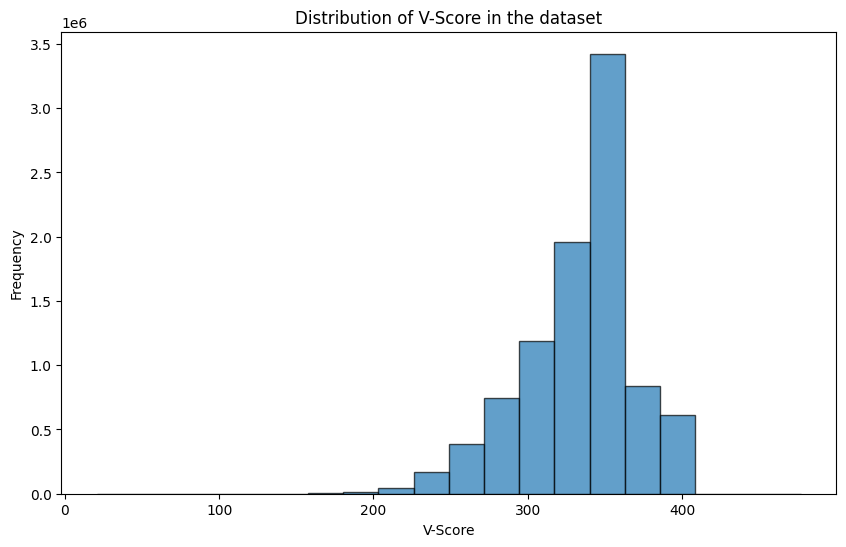

In [11]:
# Visualise the distribution of the V-Score
v_score = junction_j_productive_data["v_score"]

plt.figure(figsize=(10, 6))
plt.hist(v_score, bins=20, alpha=0.7, edgecolor='black')
plt.title("Distribution of V-Score in the dataset")
plt.xlabel("V-Score")
plt.ylabel("Frequency")
plt.show()

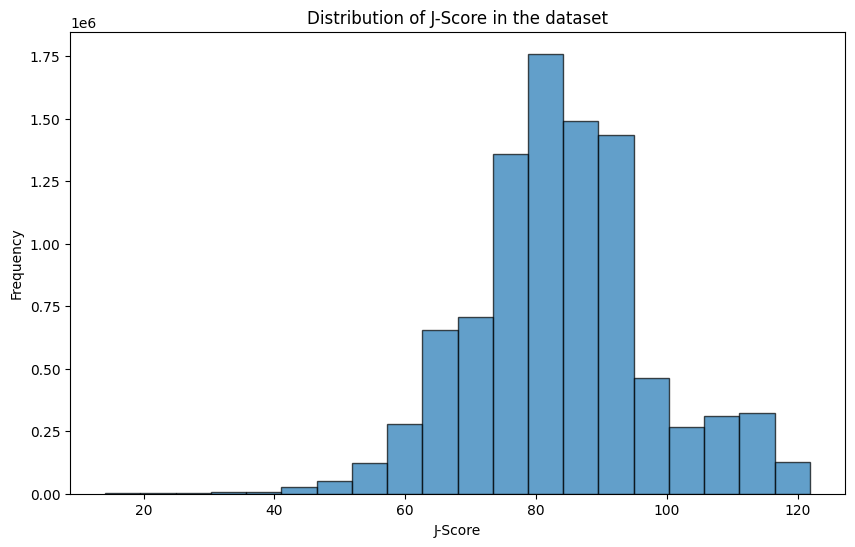

In [12]:
# Visualise the distribution of the J-Score
j_score = junction_j_productive_data["j_score"]

plt.figure(figsize=(10, 6))
plt.hist(j_score, bins=20, alpha=0.7, edgecolor='black')
plt.title("Distribution of J-Score in the dataset")
plt.xlabel("J-Score")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Filter out data that have a low V-score (threshold = 200)
vscore_junction_j_productive_data = junction_j_productive_data[junction_j_productive_data["v_score"] > 200]
print(f"The shape of the datasets after filtering with 'v_score' is : {vscore_junction_j_productive_data.shape}")

# Filter out data that have a low J-score (threshold = 40)
jscore_vscore_junction_j_productive_data = vscore_junction_j_productive_data[vscore_junction_j_productive_data["j_score"] > 40]
print(f"The shape of the datasets after filtering with 'j_score' is : {jscore_vscore_junction_j_productive_data.shape}")

The shape of the datasets after filtering with 'v_score' is : (9378516, 97)
The shape of the datasets after filtering with 'j_score' is : (9357466, 97)


In [14]:
# Filter the columns needed for feature engineering and save to a CSV file
filtered_airr_data = jscore_vscore_junction_j_productive_data

filtered_airr_data = filtered_airr_data[["sequence_id", "v_sequence_alignment", "v_germline_alignment",
                                         "v_call", "j_call", "cdr3_start", "cdr3_end",
                                         "junction_aa","np1_length", "np2_length", "disease_status"]]

filtered_airr_data = filtered_airr_data.dropna()

filtered_airr_data.to_csv("filtered_airr_data.csv", index=False)

# 2. Feature engineering

In [3]:
filtered_data = pd.read_csv("filtered_airr_data.csv")
filtered_data

,sequence_id,v_sequence_alignment,v_germline_alignment,v_call,j_call,cdr3_start,cdr3_end,junction_aa,np1_length,np2_length,disease_status
0,M00689:14:000000000-A2E6E:1:1101:14934:2065|CP...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,"IGHV1-69*01,IGHV1-69*12,IGHV1-69*13",IGHJ5*02,212.0,286.0,CARRVLPPDYDFWSGYYRGHGDWFDPW,16.0,13.0,0
1,M00689:14:000000000-A2E6E:1:1101:18849:3537|CP...,CACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCTGGA...,CACCTTCACCAGCTACTATATGCACTGGGTGCGACAGGCCCCTGGA...,IGHV1-46*01,IGHJ6*02,212.0,286.0,CARDLTYYYDSSGYFPTYYYYYGMDVW,6.0,8.0,0
2,M00689:14:000000000-A2E6E:1:1101:10681:3763|CP...,TGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTC...,TGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTC...,IGHV3-7*05,IGHJ6*02,224.0,286.0,CARDEALRSIAVAGTYYYGMDVW,16.0,0.0,0
3,M00689:14:000000000-A2E6E:1:1101:21840:3357|CP...,TGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTC...,TGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTC...,"IGHV3-23*01,IGHV3-23*04",IGHJ6*02,224.0,286.0,CAKDDSPAAGTPYYYYYYGMDVW,8.0,5.0,0
4,M00689:14:000000000-A2E6E:1:1101:10092:3445|CP...,TAAGGGATCTGGATACAGCTTTACCAGCTACTGGATCAGCTGGGTG...,TAAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCAGCTGGGTG...,"IGHV5-10-1*01,IGHV5-10-1*03",IGHJ5*02,224.0,283.0,CARLPMGKGTRSSSSLIWFDPW,22.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9113398,M00689:37:000000000-A3EUR:1:1108:12307:4605|CP...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTC...,IGHV3-30*18,IGHJ6*02,224.0,334.0,CAKDIRAPPIVVVPAAIEGDLEFLEEGSKRYYYYGMDVW,15.0,40.0,1
9113399,M00689:37:000000000-A3EUR:1:1106:5672:16499|CP...,GGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTA...,GGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTA...,IGHV1-18*04,IGHJ3*02,247.0,348.0,CARDWDGGYGSSTSCQPGSFVTTDDYGDYVSAFDIW,10.0,48.0,1
9113400,M00689:37:000000000-A3EUR:1:1105:22163:17648|C...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,IGHV3-21*01,IGHJ6*02,224.0,331.0,CARGGNVLRFLEWLLYRGGPKCRGEERTRGGRYGMDVW,8.0,48.0,1
9113401,M00689:37:000000000-A3EUR:1:2114:15943:13340|C...,TGCCGCCTCTGGATTCACCTTCAGTAACTTTGGCATGCACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTC...,IGHV3-30*18,IGHJ6*02,272.0,325.0,CAKERDFRVETYYYYGMDVW,7.0,5.0,1


## 2.1 Feature 1. Somatic hypermutation rate

In [4]:
hypermutation_rate = []

for sequence, germline in zip(filtered_data["v_sequence_alignment"], filtered_data["v_germline_alignment"]):
    match_counter = 0
    mismatch_counter = 0
    for num in range(len(sequence)):
        if sequence[num] == germline[num]:
            match_counter += 1
        else:
            mismatch_counter += 1
    hypermutation = mismatch_counter / (mismatch_counter + match_counter)
    hypermutation_rate.append(hypermutation)

filtered_data["hypermutation_rate"] = hypermutation_rate

In [5]:
hyper_c = filtered_data[filtered_data["disease_status"] == 0]["hypermutation_rate"]
hyper_ra = filtered_data[filtered_data["disease_status"] == 1]["hypermutation_rate"]

In [6]:
hyper_c.describe(), hyper_ra.describe()

(count    4.993821e+06
 mean     4.130457e-02
 std      4.533546e-02
 min      0.000000e+00
 25%      0.000000e+00
 50%      2.620087e-02
 75%      7.171315e-02
 max      2.640845e-01
 Name: hypermutation_rate, dtype: float64,
 count    4.119582e+06
 mean     3.188251e-02
 std      4.143833e-02
 min      0.000000e+00
 25%      0.000000e+00
 50%      1.265823e-02
 75%      5.179283e-02
 max      2.659933e-01
 Name: hypermutation_rate, dtype: float64)

## 2.2 Feature 2. CDR3 length

In [7]:
filtered_data["cdr3_length"] = filtered_data["cdr3_end"] - filtered_data["cdr3_start"] + 1

filtered_data

,sequence_id,v_sequence_alignment,v_germline_alignment,v_call,j_call,cdr3_start,cdr3_end,junction_aa,np1_length,np2_length,disease_status,hypermutation_rate,cdr3_length
0,M00689:14:000000000-A2E6E:1:1101:14934:2065|CP...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,"IGHV1-69*01,IGHV1-69*12,IGHV1-69*13",IGHJ5*02,212.0,286.0,CARRVLPPDYDFWSGYYRGHGDWFDPW,16.0,13.0,0,0.000000,75.0
1,M00689:14:000000000-A2E6E:1:1101:18849:3537|CP...,CACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCTGGA...,CACCTTCACCAGCTACTATATGCACTGGGTGCGACAGGCCCCTGGA...,IGHV1-46*01,IGHJ6*02,212.0,286.0,CARDLTYYYDSSGYFPTYYYYYGMDVW,6.0,8.0,0,0.050926,75.0
2,M00689:14:000000000-A2E6E:1:1101:10681:3763|CP...,TGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTC...,TGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTC...,IGHV3-7*05,IGHJ6*02,224.0,286.0,CARDEALRSIAVAGTYYYGMDVW,16.0,0.0,0,0.000000,63.0
3,M00689:14:000000000-A2E6E:1:1101:21840:3357|CP...,TGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTC...,TGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTC...,"IGHV3-23*01,IGHV3-23*04",IGHJ6*02,224.0,286.0,CAKDDSPAAGTPYYYYYYGMDVW,8.0,5.0,0,0.004329,63.0
4,M00689:14:000000000-A2E6E:1:1101:10092:3445|CP...,TAAGGGATCTGGATACAGCTTTACCAGCTACTGGATCAGCTGGGTG...,TAAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCAGCTGGGTG...,"IGHV5-10-1*01,IGHV5-10-1*03",IGHJ5*02,224.0,283.0,CARLPMGKGTRSSSSLIWFDPW,22.0,6.0,0,0.052174,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113398,M00689:37:000000000-A3EUR:1:1108:12307:4605|CP...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTC...,IGHV3-30*18,IGHJ6*02,224.0,334.0,CAKDIRAPPIVVVPAAIEGDLEFLEEGSKRYYYYGMDVW,15.0,40.0,1,0.008658,111.0
9113399,M00689:37:000000000-A3EUR:1:1106:5672:16499|CP...,GGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTA...,GGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTA...,IGHV1-18*04,IGHJ3*02,247.0,348.0,CARDWDGGYGSSTSCQPGSFVTTDDYGDYVSAFDIW,10.0,48.0,1,0.000000,102.0
9113400,M00689:37:000000000-A3EUR:1:1105:22163:17648|C...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,IGHV3-21*01,IGHJ6*02,224.0,331.0,CARGGNVLRFLEWLLYRGGPKCRGEERTRGGRYGMDVW,8.0,48.0,1,0.000000,108.0
9113401,M00689:37:000000000-A3EUR:1:2114:15943:13340|C...,TGCCGCCTCTGGATTCACCTTCAGTAACTTTGGCATGCACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTC...,IGHV3-30*18,IGHJ6*02,272.0,325.0,CAKERDFRVETYYYYGMDVW,7.0,5.0,1,0.218638,54.0


## 2.3 Feature 3. Junction amino acid using Atchley factors

In [8]:
atchley_table = pd.read_csv("atchley_factors.csv")
atchley_table

,Amino_acid,Factor_I,Factor_II,Factor_III,Factor_IV,Factor_V
0,A,-0.591,-1.302,-0.733,1.570,-0.146
1,C,-1.343,0.465,-0.862,-1.020,-0.255
2,D,1.050,0.302,-3.656,-0.259,-3.242
3,E,1.357,-1.453,1.477,0.113,-0.837
4,F,-1.006,-0.590,1.891,-0.397,0.412
5,G,-0.384,1.652,1.330,1.045,2.064
6,H,0.336,-0.417,-1.673,-1.474,-0.078
7,I,-1.239,-0.547,2.131,0.393,0.816
8,K,1.831,-0.561,0.533,-0.277,1.648
9,L,-1.019,-0.987,-1.505,1.266,-0.912


In [9]:
# Create atchley dictionary for quicker lookup
atchley_dict = atchley_table.set_index("Amino_acid").iloc[:, 0:].T.to_dict("list")

In [10]:
atchley_features_list = []
counter_X = 0
counter = 0

for sequence in filtered_data["junction_aa"]:
    sequence_factors = []
    for amino_acid in sequence:
        if amino_acid in atchley_dict:
            sequence_factors.append(atchley_dict[amino_acid])
        elif amino_acid == "X":
            print(f"Skipping unknown amino acid 'X' in sequence {sequence}.")
            counter_X += 1
        else:
            print(f"Amino acid {amino_acid} not found in Atchley table.")
            counter += 1
    if sequence_factors:
        # Convert to DataFrame or NumPy array, then compute mean
        mean_factors = pd.DataFrame(sequence_factors, columns=atchley_table.columns[1:]).mean()
        atchley_features_list.append(mean_factors)

# Combine all results into a DataFrame
atchley_features = pd.DataFrame(atchley_features_list)

Skipping unknown amino acid 'X' in sequence CATVRYNWXDPFDHW.
Skipping unknown amino acid 'X' in sequence CARGFLGGVLEPXNYFDYW.
Skipping unknown amino acid 'X' in sequence CARGWGYRIDPX.
Skipping unknown amino acid 'X' in sequence CGRVEYPEYCGGDCYPLXYW.
Skipping unknown amino acid 'X' in sequence CARGSPTHYYGGNSXDWFDPW.
Skipping unknown amino acid 'X' in sequence CARAGAAAGKXYW.
Skipping unknown amino acid 'X' in sequence CARDAPIYGDPTPFXYW.
Skipping unknown amino acid 'X' in sequence CAVPPYPTHHFAIGXW.
Skipping unknown amino acid 'X' in sequence CTRPAEMATMGVFDXW.
Skipping unknown amino acid 'X' in sequence CARGAQRVAAAAPXYW.
Skipping unknown amino acid 'X' in sequence CAKEGYGSAYDXXXW.
Skipping unknown amino acid 'X' in sequence CAKEGYGSAYDXXXW.
Skipping unknown amino acid 'X' in sequence CAKEGYGSAYDXXXW.
Skipping unknown amino acid 'X' in sequence CARGAAARSDTPXXYW.
Skipping unknown amino acid 'X' in sequence CARGAAARSDTPXXYW.
Skipping unknown amino acid 'X' in sequence CARRFGGYFXYW.
Skipping u

In [11]:
counter_X, counter

(852, 0)

In [12]:
filtered_data = pd.concat([filtered_data.reset_index(drop=True), atchley_features.reset_index(drop=True)], axis=1)
filtered_data

,sequence_id,v_sequence_alignment,v_germline_alignment,v_call,j_call,cdr3_start,cdr3_end,junction_aa,np1_length,np2_length,disease_status,hypermutation_rate,cdr3_length,Factor_I,Factor_II,Factor_III,Factor_IV,Factor_V
0,M00689:14:000000000-A2E6E:1:1101:14934:2065|CP...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,AGGCACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCT...,"IGHV1-69*01,IGHV1-69*12,IGHV1-69*13",IGHJ5*02,212.0,286.0,CARRVLPPDYDFWSGYYRGHGDWFDPW,16.0,13.0,0,0.000000,75.0,0.038148,0.461407,-0.222222,-0.102074,-0.101963
1,M00689:14:000000000-A2E6E:1:1101:18849:3537|CP...,CACCTTCAGCAGCTATGCTATCAGCTGGGTGCGACAGGCCCCTGGA...,CACCTTCACCAGCTACTATATGCACTGGGTGCGACAGGCCCCTGGA...,IGHV1-46*01,IGHJ6*02,212.0,286.0,CARDLTYYYDSSGYFPTYYYYYGMDVW,6.0,8.0,0,0.050926,75.0,-0.023148,0.479556,0.573444,-0.099407,0.211556
2,M00689:14:000000000-A2E6E:1:1101:10681:3763|CP...,TGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTC...,TGCAGCCTCTGGATTCACCTTTAGTAGCTATTGGATGAGCTGGGTC...,IGHV3-7*05,IGHJ6*02,224.0,286.0,CARDEALRSIAVAGTYYYGMDVW,16.0,0.0,0,0.000000,63.0,-0.157043,-0.077826,0.226435,0.343435,0.146609
3,M00689:14:000000000-A2E6E:1:1101:21840:3357|CP...,TGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTC...,TGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTC...,"IGHV3-23*01,IGHV3-23*04",IGHJ6*02,224.0,286.0,CAKDDSPAAGTPYYYYYYGMDVW,8.0,5.0,0,0.004329,63.0,0.007826,0.403522,0.186522,0.009870,0.003348
4,M00689:14:000000000-A2E6E:1:1101:10092:3445|CP...,TAAGGGATCTGGATACAGCTTTACCAGCTACTGGATCAGCTGGGTG...,TAAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCAGCTGGGTG...,"IGHV5-10-1*01,IGHV5-10-1*03",IGHJ5*02,224.0,283.0,CARLPMGKGTRSSSSLIWFDPW,22.0,6.0,0,0.052174,60.0,-0.156682,0.343864,-0.661909,0.212773,-0.176545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113398,M00689:37:000000000-A3EUR:1:1108:12307:4605|CP...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTC...,IGHV3-30*18,IGHJ6*02,224.0,334.0,CAKDIRAPPIVVVPAAIEGDLEFLEEGSKRYYYYGMDVW,15.0,40.0,1,0.008658,111.0,-0.039256,-0.046128,0.203564,0.310923,-0.061282
9113399,M00689:37:000000000-A3EUR:1:1106:5672:16499|CP...,GGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTA...,GGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTA...,IGHV1-18*04,IGHJ3*02,247.0,348.0,CARDWDGGYGSSTSCQPGSFVTTDDYGDYVSAFDIW,10.0,48.0,1,0.000000,102.0,-0.122250,0.512250,-0.647444,0.181000,-0.452611
9113400,M00689:37:000000000-A3EUR:1:1105:22163:17648|C...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATAGCATGAACTGGGTC...,IGHV3-21*01,IGHJ6*02,224.0,331.0,CARGGNVLRFLEWLLYRGGPKCRGEERTRGGRYGMDVW,8.0,48.0,1,0.000000,108.0,0.089000,0.161421,0.695500,0.319658,0.815579
9113401,M00689:37:000000000-A3EUR:1:2114:15943:13340|C...,TGCCGCCTCTGGATTCACCTTCAGTAACTTTGGCATGCACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTC...,IGHV3-30*18,IGHJ6*02,272.0,325.0,CAKERDFRVETYYYYGMDVW,7.0,5.0,1,0.218638,54.0,0.173650,-0.058750,0.860450,-0.079200,0.361200


## 2.4 Feature 4. NP1 and NP2 length

In [13]:
filtered_data[["np1_length", "np2_length"]]

,np1_length,np2_length
0,16.0,13.0
1,6.0,8.0
2,16.0,0.0
3,8.0,5.0
4,22.0,6.0
...,...,...
9113398,15.0,40.0
9113399,10.0,48.0
9113400,8.0,48.0
9113401,7.0,5.0


## 2.5 Feature 5. V and J segemnt usage

In [14]:
# Extract the V and J segments from the v_call and j_call columns
v_segments = []
j_segments = []

def extract_segment_call(sequence):
    segment_list = []
    for seg in sequence.split(","):
        s = seg.split("*")[0]  # Extract the part before '*'
        segment_list.append(s)
    segment_list = list(set(segment_list))  # Remove duplicates
    return segment_list

for sequences in filtered_data["v_call"]:
    v_segment = extract_segment_call(sequences)
    v_segments.append(v_segment)

for sequences in filtered_data["j_call"]:
    j_segment = extract_segment_call(sequences)
    j_segments.append(j_segment)

filtered_data["v_usage"] = v_segments
filtered_data["j_usage"] = j_segments

In [15]:
# Extract all the possible v and j segment usage using refernce sheet
vdj = pd.read_csv("Homo_sapiens_IGH_VDJ_rev_9_ungapped_ex.fasta", header=None)
vj = vdj[vdj[0].str.contains("IGHV|IGHJ")]

v_list = []
j_list = []

for seg in vj[0]:
    segtype = seg.split(">")[1]
    segtype = segtype.split("*")[0]
    if segtype.startswith("IGHV"):
        v_list.append(segtype)
    elif segtype.startswith("IGHJ"):
        j_list.append(segtype)

v_list = list(set(v_list))
j_list = list(set(j_list))

In [16]:
# transform the v and j segment usage
v_encoder = MultiLabelBinarizer(classes=v_list)
v_transformed = v_encoder.fit_transform(filtered_data["v_usage"])
v_transformed_dataframe = pd.DataFrame(v_transformed, columns=v_encoder.classes_)
v_transformed_dataframe.to_csv("v_transformed.csv", index=False)

j_encoder = MultiLabelBinarizer(classes=j_list)
j_transformed = j_encoder.fit_transform(filtered_data["j_usage"])
j_transformed_dataframe = pd.DataFrame(j_transformed, columns=j_encoder.classes_)
j_transformed_dataframe.to_csv("j_transformed.csv", index=False)

vj_transformed = pd.concat([v_transformed_dataframe, j_transformed_dataframe], axis=1)

In [17]:
feature_data = pd.concat([filtered_data[["sequence_id", "hypermutation_rate", "cdr3_length",
                              "Factor_I", "Factor_II", "Factor_III", "Factor_IV",
                              "Factor_V", "np1_length", "np2_length"]], vj_transformed,
                              filtered_data["disease_status"]], axis=1)

feature_data.to_csv("sequence_feature_data.csv", index=False)

# 3. Training and testing data split

In [3]:
data = pd.read_csv("/home/s2106664/msc_project/exploratory_and_data_cleaning/sequence_feature_data.csv")
data

,sequence_id,hypermutation_rate,cdr3_length,Factor_I,Factor_II,Factor_III,Factor_IV,Factor_V,np1_length,np2_length,...,IGHV7-4-1,IGHV4-61,IGHV3-30,IGHJ1,IGHJ6,IGHJ4,IGHJ3,IGHJ5,IGHJ2,disease_status
0,M00689:14:000000000-A2E6E:1:1101:14934:2065|CP...,0.000000,75.0,0.038148,0.461407,-0.222222,-0.102074,-0.101963,16.0,13.0,...,0,0,0,0,0,0,0,1,0,0
1,M00689:14:000000000-A2E6E:1:1101:18849:3537|CP...,0.050926,75.0,-0.023148,0.479556,0.573444,-0.099407,0.211556,6.0,8.0,...,0,0,0,0,1,0,0,0,0,0
2,M00689:14:000000000-A2E6E:1:1101:10681:3763|CP...,0.000000,63.0,-0.157043,-0.077826,0.226435,0.343435,0.146609,16.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,M00689:14:000000000-A2E6E:1:1101:21840:3357|CP...,0.004329,63.0,0.007826,0.403522,0.186522,0.009870,0.003348,8.0,5.0,...,0,0,0,0,1,0,0,0,0,0
4,M00689:14:000000000-A2E6E:1:1101:10092:3445|CP...,0.052174,60.0,-0.156682,0.343864,-0.661909,0.212773,-0.176545,22.0,6.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113398,M00689:37:000000000-A3EUR:1:1108:12307:4605|CP...,0.008658,111.0,-0.039256,-0.046128,0.203564,0.310923,-0.061282,15.0,40.0,...,0,0,1,0,1,0,0,0,0,1
9113399,M00689:37:000000000-A3EUR:1:1106:5672:16499|CP...,0.000000,102.0,-0.122250,0.512250,-0.647444,0.181000,-0.452611,10.0,48.0,...,0,0,0,0,0,0,1,0,0,1
9113400,M00689:37:000000000-A3EUR:1:1105:22163:17648|C...,0.000000,108.0,0.089000,0.161421,0.695500,0.319658,0.815579,8.0,48.0,...,0,0,0,0,1,0,0,0,0,1
9113401,M00689:37:000000000-A3EUR:1:2114:15943:13340|C...,0.218638,54.0,0.173650,-0.058750,0.860450,-0.079200,0.361200,7.0,5.0,...,0,0,1,0,1,0,0,0,0,1


In [4]:
data.columns

Index(['sequence_id', 'hypermutation_rate', 'cdr3_length', 'Factor_I',
       'Factor_II', 'Factor_III', 'Factor_IV', 'Factor_V', 'np1_length',
       'np2_length', 'IGHV3-53', 'IGHV3-64D', 'IGHV3-23', 'IGHV3-9',
       'IGHV1-45', 'IGHV3-20', 'IGHV3-11', 'IGHV3-16', 'IGHV1-69', 'IGHV3-15',
       'IGHV4-38-2', 'IGHV3-43D', 'IGHV1-46', 'IGHV3-NL1', 'IGHV3-74',
       'IGHV2-5', 'IGHV3-19', 'IGHV4-59', 'IGHV8-51-1', 'IGHV1-58', 'IGHV3-73',
       'IGHV4-30-2', 'IGHV4-39', 'IGHV1-24', 'IGHV4-4', 'IGHV4-28',
       'IGHV1-69-2', 'IGHV3-21', 'IGHV3-62', 'IGHV3-25', 'IGHV7-81',
       'IGHV3-33', 'IGHV3-13', 'IGHV1-8', 'IGHV3-38', 'IGHV6-1', 'IGHV3-69-1',
       'IGHV5-51', 'IGHV3-30-3', 'IGHV4-30-4', 'IGHV4-31', 'IGHV3-72',
       'IGHV4-NL1', 'IGHV3-38-3', 'IGHV5-10-1', 'IGHV1-2', 'IGHV2-70',
       'IGHV3-47', 'IGHV3-64', 'IGHV3-43', 'IGHV4-34', 'IGHV3-49', 'IGHV3-48',
       'IGHV3-66', 'IGHV1-18', 'IGHV3-35', 'IGHV2-70D', 'IGHV2-26', 'IGHV1-3',
       'IGHV3-7', 'IGHV7-4-1', 'IGHV4-61'

In [5]:
data.shape

(9113403, 80)

## 3.1 Complete dataset split

In [6]:
X_train, X_rest, y_train, y_rest = train_test_split(data.drop(columns=["sequence_id", "disease_status"]),
                                                      data["disease_status"], train_size=0.8, test_size=0.2,
                                                      random_state=42, shuffle=True, stratify=data["disease_status"])

X_validate, X_test, y_validate, y_test = train_test_split(X_rest, y_rest, train_size=0.5, test_size=0.5,
                                                      random_state=42, shuffle=True, stratify=y_rest)

In [9]:
# Save each datasets into training_testing_dataset folder
X_train.to_csv("/home/s2106664/msc_project/training_testing_dataset/X_train.csv", index=False)
X_validate.to_csv("/home/s2106664/msc_project/training_testing_dataset/X_validate.csv", index=False)
X_test.to_csv("/home/s2106664/msc_project/training_testing_dataset/X_test.csv", index=False)

y_train.to_csv("/home/s2106664/msc_project/training_testing_dataset/y_train.csv", index=False)
y_validate.to_csv("/home/s2106664/msc_project/training_testing_dataset/y_validate.csv", index=False)
y_test.to_csv("/home/s2106664/msc_project/training_testing_dataset/y_test.csv", index=False)